# Sidereal variation in the atmospheric neutrino flux using the vector model

2D plots of oscillation probabilities vs neutrino energy (x-axis) and declination (y-axis) at the IceCube detector for a fixed right ascension

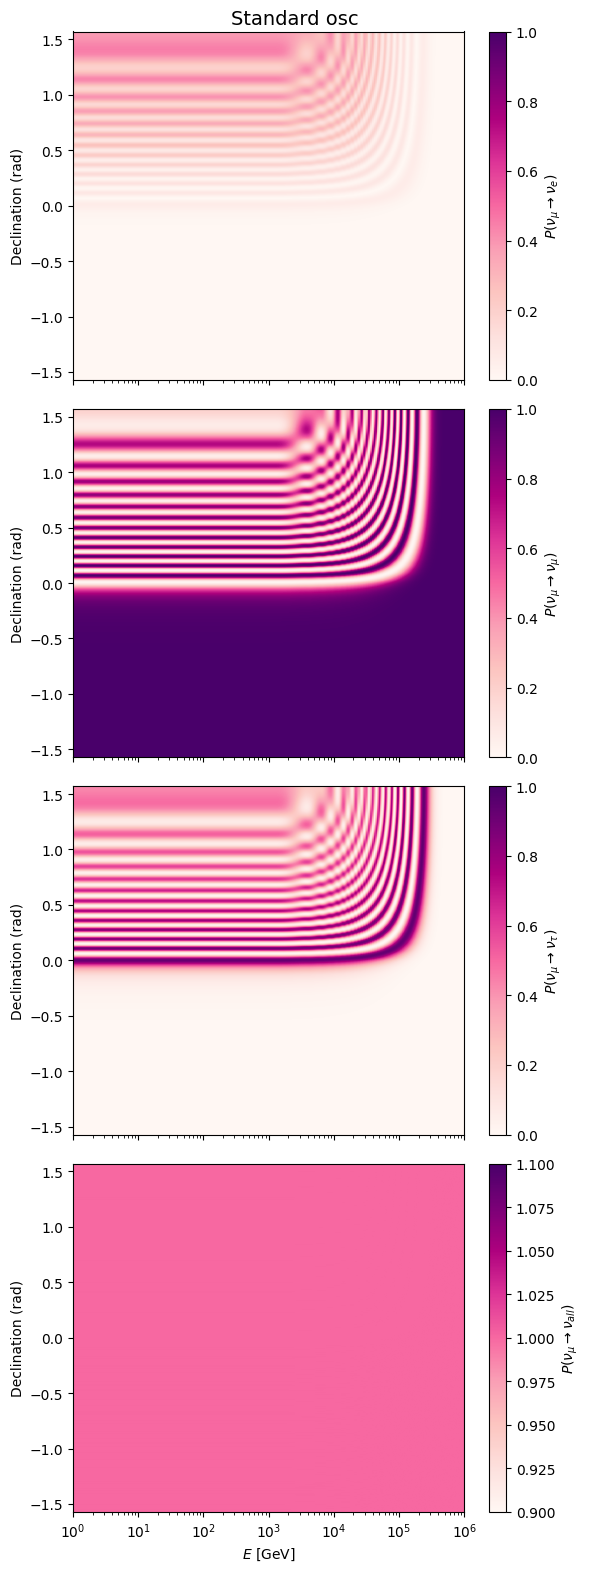

/media/janni/DellPortableHardDrive/Ubuntu/Documents/IceCube-NBI/deimos/deimos/wrapper/osc_calculator.py:593: UserWarning: The coszen argument was ignored. Zenith angle was calculated from RA and declination.
  warnings.warn("The coszen argument was ignored. Zenith angle was calculated from RA and declination.")


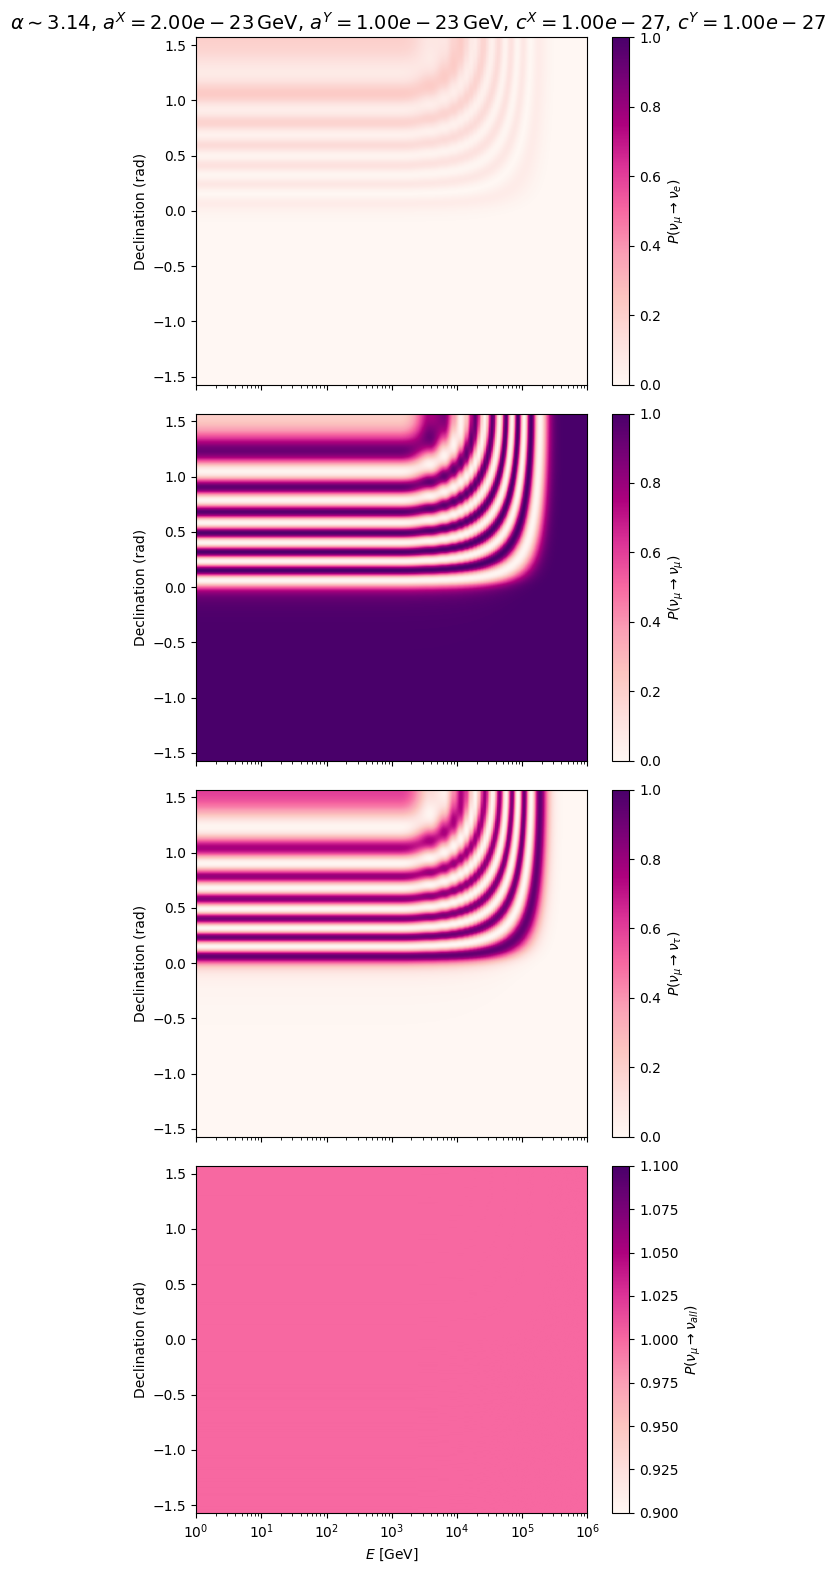

In [1]:
import sys, os, collections
import numpy as np
from deimos.wrapper.osc_calculator import *
from deimos.utils.plotting import *
from deimos.utils.coordinates import *

'''
Set detector location and location of the neutrino source on the sky
'''

#Parameters

#Detector location (IceCube)
detector_lat = "89°59′24″S"
detector_long = "63°27′11″W"
detector_height = 1400

#Resolution
num =400

#Neutrino source
ra = np.full(num,180)
dec = np.linspace(-90,90,num)
date_str = "July 17, 2022, 23:20"
utc_offset_hr = 0


#Calculate coszen
coordinates = CoordTransform(
    detector_lat = detector_lat, 
    detector_long = detector_long, 
    detector_height_m = detector_height
)

coszen, azimuth = coordinates.get_coszen_and_azimuth(
    ra = ra,
    dec = dec,
    date_str = date_str,
    utc_offset_hr = utc_offset_hr
)

#print('coszen = ', coszen)


'''
Plot neutrino oscillations @IceCube
'''


#
# Main
#

if __name__ == "__main__" :
    
    
    #
    # Create model
    #

    # Create calculator
    calculator = OscCalculator(
        tool="deimos",
        atmospheric=True,
        num_neutrinos=3,
    )

    # Use vacuum
    calculator.set_matter("vacuum")
    

    #
    # Define neutrino
    #

    initial_flavor, nubar = 1, False # muon neutrino
    E_GeV = np.geomspace(1., 1e6, num=num)
    coszen = coszen
        
    a_eV=np.array([2e-23,1e-23])
    c=np.array([1e-27,1e-27])


    #
    # Plot oscillation vs energy
    #

    # Calc osc probs and plot, without new physics
    calculator.set_std_osc()
    fig, ax, _, = calculator.plot_declination_vs_energy_2D(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="black", label="Standard osc")
    # Save the first figure as a PDF
    #fig.savefig("standard_oscillation.pdf")
    
    # Calc osc probs and plot, with SME
    calculator.set_sme(a_eV=a_eV, c=c)
    
    
    # Set detector location
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
                                     
    # Set neutrino source
    calculator.set_neutrino_source(ra = ra,
                                  dec = dec,
                                  date_str = date_str)
    
    fig, ax, _, = calculator.plot_declination_vs_energy_2D(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="orange", label=r"SME ($a^x = %0.3g$ eV, $a^y = %0.3g$ eV, $c^{tx} = %0.3g$, $c^{ty} = %0.3g$)"%(a_eV[0], a_eV[1], c[0], c[1]), linestyle="--")
    
    # Save the second figure as a PDF
    fig.savefig("SME_oscillation.pdf")
    #label=f"SME (a (in eV) = {tuple(f"{val:.3g}" for val in a)}, c = {tuple(f"{val:.3g}" for val in c)})"                                                                                                                                            

    #
    # Done
    #

2D plots of the difference of the oscillation probabilities between the vector model and the standard oscillations vs neutrino energy (x-axis) and declination (y-axis) at the IceCube detector for a fixed right ascension

/media/janni/DellPortableHardDrive/Ubuntu/Documents/IceCube-NBI/deimos/deimos/wrapper/osc_calculator.py:593: UserWarning: The coszen argument was ignored. Zenith angle was calculated from RA and declination.
  warnings.warn("The coszen argument was ignored. Zenith angle was calculated from RA and declination.")


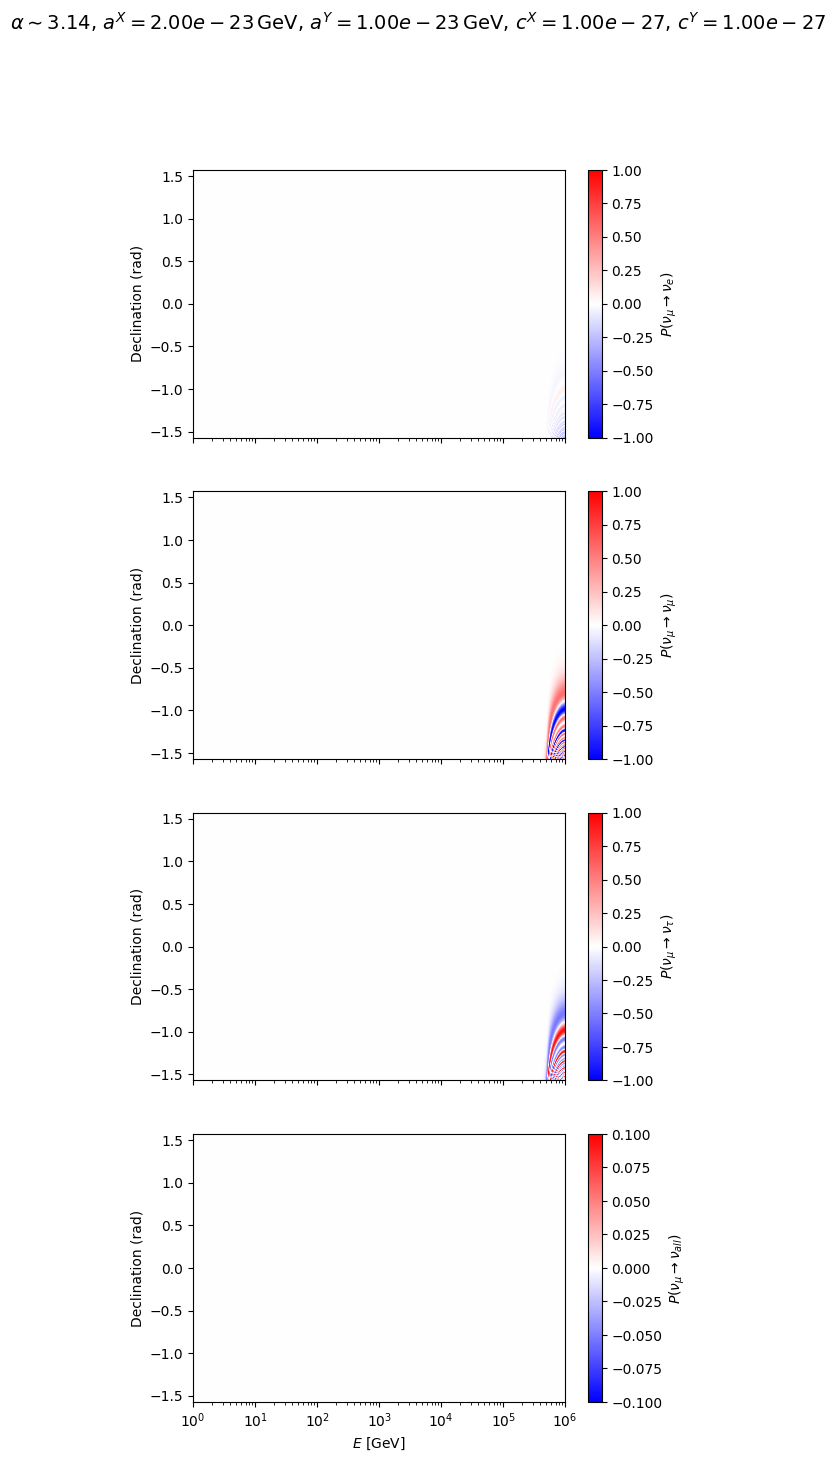

In [2]:
import sys, os, collections
import numpy as np
from deimos.wrapper.osc_calculator import *
from deimos.utils.plotting import *
from deimos.utils.coordinates import *

'''
Set detector location and location of the neutrino source on the sky
'''

#Parameters

#Detector location (IceCube)
detector_lat = "89°59′24″S"
detector_long = "63°27′11″W"
detector_height = 1400

#Resolution
num =400

#Neutrino source
ra = np.full(num,180)
dec = np.linspace(-90,90,num)
date_str = "July 17, 2022, 23:20"
utc_offset_hr = 0


#Calculate coszen
coordinates = CoordTransform(
    detector_lat = detector_lat, 
    detector_long = detector_long, 
    detector_height_m = detector_height
)

coszen, azimuth = coordinates.get_coszen_and_azimuth(
    ra = ra,
    dec = dec,
    date_str = date_str,
    utc_offset_hr = utc_offset_hr
)

#print('coszen = ', coszen)



'''
Plot neutrino oscillations @IceCube
'''


#
# Main
#

if __name__ == "__main__" :
    
    
    #
    # Create model
    #

    # Create calculator
    calculator = OscCalculator(
        tool="deimos",
        atmospheric=True,
        num_neutrinos=3,
    )

    # Use vacuum
    calculator.set_matter("vacuum")
    

    #
    # Define neutrino
    #

    initial_flavor, nubar = 1, False # muon neutrino
    E_GeV = np.geomspace(1., 1e6, num=num)
    coszen = coszen
        
    a_eV=np.array([2e-23,1e-23])
    c=np.array([1e-27,1e-27])


    #
    # Plot oscillation vs energy
    #
    
    # Calc osc probs and plot, with SME
    calculator.set_sme(a_eV=a_eV, c=c)
    
    
    # Set detector location
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
                                     
    # Set neutrino source
    calculator.set_neutrino_source(ra = ra,
                                  dec = dec,
                                  date_str = date_str)
    
    fig, ax, _, = calculator.plot_declination_vs_energy_2D_diff(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="orange", label=r"SME ($a^x = %0.3g$ eV, $a^y = %0.3g$ eV, $c^{tx} = %0.3g$, $c^{ty} = %0.3g$)"%(a_eV[0], a_eV[1], c[0], c[1]), linestyle="--")
    
    # Save the second figure as a PDF
    fig.savefig("SME_standard_oscillation_diff.pdf")
    #label=f"SME (a (in eV) = {tuple(f"{val:.3g}" for val in a)}, c = {tuple(f"{val:.3g}" for val in c)})"                                                                                                                                            

    #
    # Done
    #

2D plots of oscillation probabilities vs neutrino energy (x-axis) and right ascension (y-axis) at the IceCube detector for a fixed declination

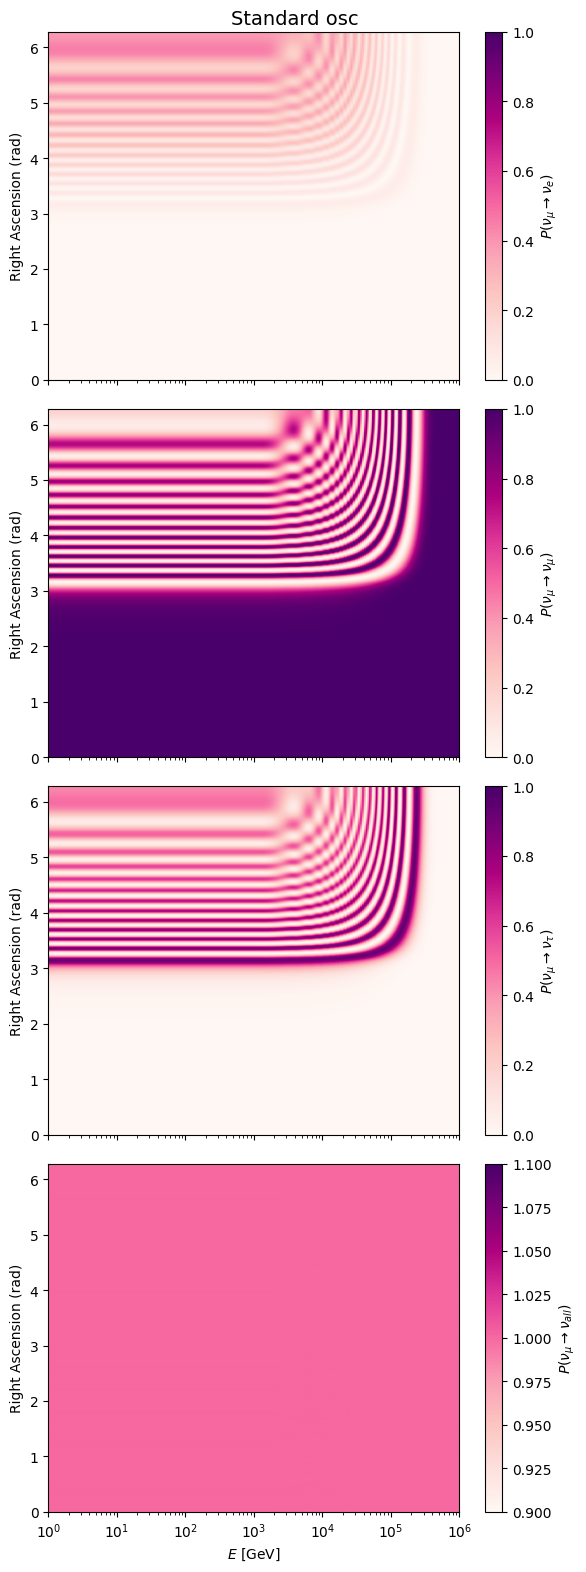

/media/janni/DellPortableHardDrive/Ubuntu/Documents/IceCube-NBI/deimos/deimos/wrapper/osc_calculator.py:593: UserWarning: The coszen argument was ignored. Zenith angle was calculated from RA and declination.
  warnings.warn("The coszen argument was ignored. Zenith angle was calculated from RA and declination.")


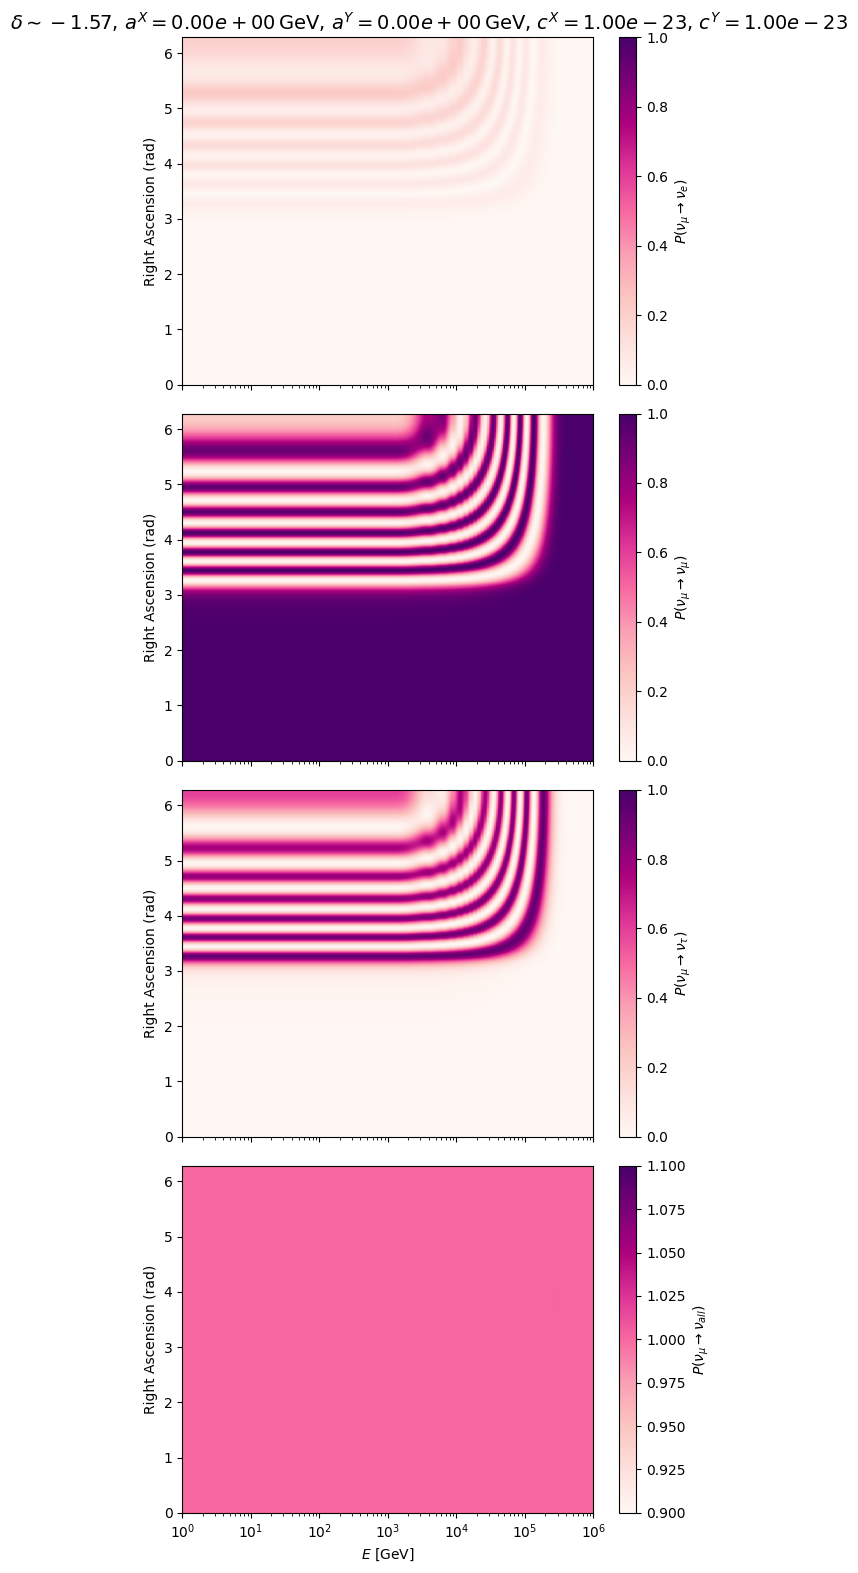

In [3]:
import sys, os, collections
import numpy as np
from deimos.wrapper.osc_calculator import *
from deimos.utils.plotting import *
from deimos.utils.coordinates import *

'''
Set detector location and location of the neutrino source on the sky
'''

#Parameters

#Detector location (IceCube)
detector_lat = "89°59′24″S"
detector_long = "63°27′11″W"
detector_height = 1400

#Resolution
num =400

#Neutrino source
ra = np.full(num,180)
dec = np.linspace(-90,90,num)
date_str = "July 17, 2022, 23:20"
utc_offset_hr = 0


#Calculate coszen
coordinates = CoordTransform(
    detector_lat = detector_lat, 
    detector_long = detector_long, 
    detector_height_m = detector_height
)

coszen, azimuth = coordinates.get_coszen_and_azimuth(
    ra = ra,
    dec = dec,
    date_str = date_str,
    utc_offset_hr = utc_offset_hr
)

#print('coszen = ', coszen)


'''
Plot neutrino oscillations @IceCube
'''


#
# Main
#

if __name__ == "__main__" :
    
    
    #
    # Create model
    #

    # Create calculator
    calculator = OscCalculator(
        tool="deimos",
        atmospheric=True,
        num_neutrinos=3,
    )

    # Use vacuum
    calculator.set_matter("vacuum")
    

    #
    # Define neutrino
    #

    initial_flavor, nubar = 1, False # muon neutrino
    E_GeV = np.geomspace(1., 1e6, num=num)
    coszen = coszen
        
    a_eV=np.array([0,0])
    c=np.array([1e-23,1e-23])


    #
    # Plot oscillation vs energy
    #

    # Calc osc probs and plot, without new physics
    calculator.set_std_osc()
    fig, ax, _, = calculator.plot_right_ascension_vs_energy_2D(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="black", label="Standard osc")
    fig.savefig("standard_oscillation_varying_ra.pdf")
    # Calc osc probs and plot, with SME
    calculator.set_sme(a_eV=a_eV, c=c)
    
    
    # Set detector location
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
                                     
    # Set neutrino source
    calculator.set_neutrino_source(ra = ra,
                                  dec = dec,
                                  date_str = date_str)
    
    fig, ax, _, = calculator.plot_right_ascension_vs_energy_2D(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="orange", label=r"SME ($a^x = %0.3g$ eV, $a^y = %0.3g$ eV, $c^{tx} = %0.3g$, $c^{ty} = %0.3g$)"%(a_eV[0], a_eV[1], c[0], c[1]), linestyle="--")
    fig.savefig("SME_oscillation_varying_ra.pdf")
    #label=f"SME (a (in eV) = {tuple(f"{val:.3g}" for val in a)}, c = {tuple(f"{val:.3g}" for val in c)})"                                                                                                                                            

    #
    # Done
    #

2D plots of the difference of the oscillation probabilities between the vector model and the standard oscillations vs neutrino energy (x-axis) and right ascension (y-axis) at the IceCube detector for a fixed declination

/media/janni/DellPortableHardDrive/Ubuntu/Documents/IceCube-NBI/deimos/deimos/wrapper/osc_calculator.py:594: UserWarning: The coszen argument was ignored. Zenith angle was calculated from RA and declination.
  warnings.warn("The coszen argument was ignored. Zenith angle was calculated from RA and declination.")


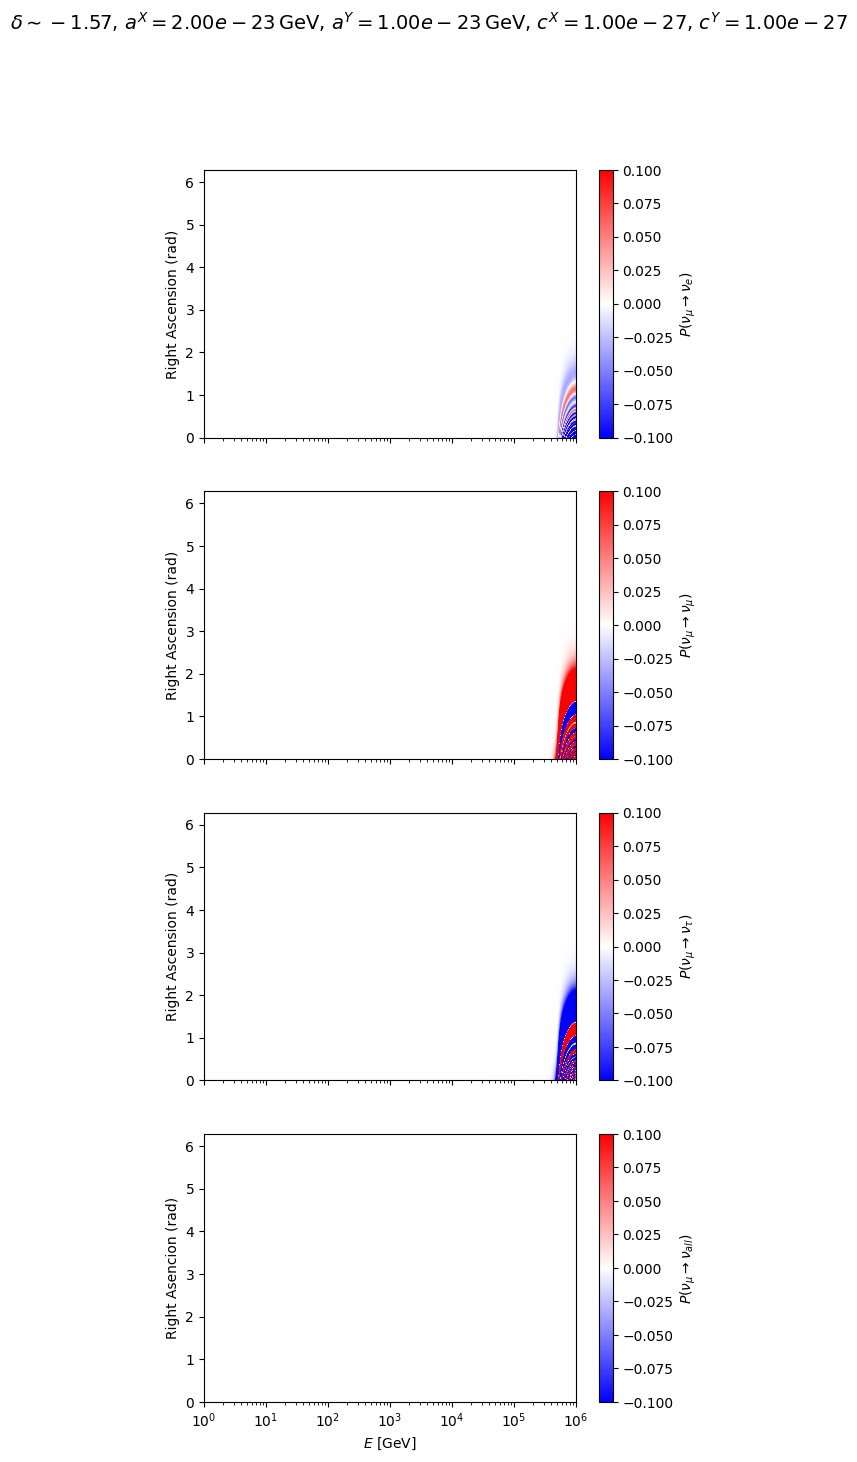

In [1]:
import sys, os, collections
import numpy as np
from deimos.wrapper.osc_calculator import *
from deimos.utils.plotting import *
from deimos.utils.coordinates import *

'''
Set detector location and location of the neutrino source on the sky
'''

#Parameters

#Detector location (IceCube)
detector_lat = "89°59′24″S"
detector_long = "63°27′11″W"
detector_height = 1400

#Resolution
num =400

#Neutrino source
ra = np.full(num,180)
dec = np.linspace(-90,90,num)
date_str = "July 17, 2022, 23:20"
utc_offset_hr = 0


#Calculate coszen
coordinates = CoordTransform(
    detector_lat = detector_lat, 
    detector_long = detector_long, 
    detector_height_m = detector_height
)

coszen, azimuth = coordinates.get_coszen_and_azimuth(
    ra = ra,
    dec = dec,
    date_str = date_str,
    utc_offset_hr = utc_offset_hr
)

#print('coszen = ', coszen)


'''
Plot neutrino oscillations @IceCube
'''


#
# Main
#

if __name__ == "__main__" :
    
    
    #
    # Create model
    #

    # Create calculator
    calculator = OscCalculator(
        tool="deimos",
        atmospheric=True,
        num_neutrinos=3,
    )

    # Use vacuum
    calculator.set_matter("vacuum")
    

    #
    # Define neutrino
    #

    initial_flavor, nubar = 1, False # muon neutrino
    E_GeV = np.geomspace(1., 1e6, num=num)
    coszen = coszen
        
    a_eV=np.array([2e-23,1e-23])
    c=np.array([1e-27,1e-27])


    #
    # Plot oscillation vs energy
    #
    
    # Calc osc probs and plot, with SME
    calculator.set_sme(a_eV=a_eV, c=c)
    
    
    # Set detector location
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
                                     
    # Set neutrino source
    calculator.set_neutrino_source(ra = ra,
                                  dec = dec,
                                  date_str = date_str)
    
    fig, ax, _, = calculator.plot_right_ascension_vs_energy_2D_diff(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="orange", label=r"SME ($a^x = %0.3g$ eV, $a^y = %0.3g$ eV, $c^{tx} = %0.3g$, $c^{ty} = %0.3g$)"%(a_eV[0], a_eV[1], c[0], c[1]), linestyle="--")
    
    # Save the second figure as a PDF
    fig.savefig("SME_standard_oscillation_diff_varying_ra.pdf")
    #label=f"SME (a (in eV) = {tuple(f"{val:.3g}" for val in a)}, c = {tuple(f"{val:.3g}" for val in c)})"                                                                                                                                            

    #
    # Done
    #